#Import libraries 



In [1]:
# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import seaborn as sns # statistical data visualization
# from sklearn.model_selection import GridSearchCV

# sns.set()
# import sys
# import matplotlib.pyplot as plt # data visualization
# %matplotlib inline
# name = 'keras_tuner'
# if name not in sys.modules:
#   !pip install keras_tuner
#   import keras_tuner as kt
# else:
#   import keras_tuner as kt

# from time import time
# from collections import Counter

# #model selection
# from sklearn.model_selection import train_test_split

# #Preproccsing
# from sklearn import preprocessing
# from sklearn.preprocessing import StandardScaler , OneHotEncoder
# import zipfile
# import os


# #DEEP LEARNING
# from keras.layers.core import Dense
# from keras.layers import Dropout
# from tensorflow import keras
# from keras.models import Sequential
# from keras import regularizers
# from tensorflow.keras.optimizers import SGD
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.optimizers import RMSprop

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from keras import optimizers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import cv2 as cv
import os
import zipfile
import os
import seaborn as sns
from sklearn.metrics import log_loss
from keras.regularizers import l2
from keras import regularizers
from tensorflow.keras.optimizers import  SGD, Adam, RMSprop

#load the data

In [3]:
df_train = pd.read_csv('/content/train.csv',index_col=0)
df_train

,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
id,,,,,,,,,,,,,,,,,,,,,
1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.000000,0.000000,0.004883,0.000000,0.025391
2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.000000,0.000000,0.000977,0.039062,0.022461
3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,0.000000,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.000000,0.000000,0.000000,0.020508,0.002930
5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,0.013672,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.000000,0.000000,0.017578,0.000000,0.047852
6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,0.000000,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1575,Magnolia_Salicifolia,0.060547,0.119140,0.007812,0.003906,0.000000,0.148440,0.017578,0.0,0.001953,...,0.242190,0.000000,0.034180,0.000000,0.010742,0.000000,0.000000,0.000000,0.000000,0.018555
1578,Acer_Pictum,0.001953,0.003906,0.021484,0.107420,0.001953,0.000000,0.000000,0.0,0.029297,...,0.170900,0.000000,0.018555,0.000000,0.011719,0.000000,0.000000,0.000977,0.000000,0.021484
1581,Alnus_Maximowiczii,0.001953,0.003906,0.000000,0.021484,0.078125,0.003906,0.007812,0.0,0.003906,...,0.004883,0.000977,0.004883,0.027344,0.016602,0.007812,0.000000,0.027344,0.000000,0.001953


In [4]:
df_test = pd.read_csv('/content/test.csv',index_col=0)
df_test

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
id,,,,,,,,,,,,,,,,,,,,,
4,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.000000,0.005859,0.023438,...,0.006836,0.000000,0.015625,0.000977,0.015625,0.0,0.0,0.000000,0.003906,0.053711
7,0.007812,0.005859,0.064453,0.009766,0.003906,0.013672,0.007812,0.000000,0.033203,0.023438,...,0.000000,0.000000,0.006836,0.001953,0.013672,0.0,0.0,0.000977,0.037109,0.044922
9,0.000000,0.000000,0.001953,0.021484,0.041016,0.000000,0.023438,0.000000,0.011719,0.005859,...,0.128910,0.000000,0.000977,0.000000,0.000000,0.0,0.0,0.015625,0.000000,0.000000
12,0.000000,0.000000,0.009766,0.011719,0.017578,0.000000,0.003906,0.000000,0.003906,0.001953,...,0.012695,0.015625,0.002930,0.036133,0.013672,0.0,0.0,0.089844,0.000000,0.008789
13,0.001953,0.000000,0.015625,0.009766,0.039062,0.000000,0.009766,0.000000,0.005859,0.000000,...,0.000000,0.042969,0.016602,0.010742,0.041016,0.0,0.0,0.007812,0.009766,0.007812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576,0.000000,0.000000,0.003906,0.015625,0.041016,0.000000,0.017578,0.000000,0.005859,0.013672,...,0.098633,0.000000,0.004883,0.000000,0.003906,0.0,0.0,0.018555,0.000000,0.000977
1577,0.000000,0.003906,0.003906,0.005859,0.017578,0.000000,0.017578,0.005859,0.000000,0.005859,...,0.012695,0.004883,0.004883,0.002930,0.009766,0.0,0.0,0.090820,0.000000,0.016602
1579,0.017578,0.029297,0.015625,0.013672,0.003906,0.015625,0.025391,0.000000,0.000000,0.009766,...,0.073242,0.000000,0.028320,0.000000,0.001953,0.0,0.0,0.000000,0.042969,0.006836


#clean the data

In [5]:
df_train['species'].value_counts()[:10]  # print first 10 species

Acer_Opalus            10
Crataegus_Monogyna     10
Acer_Mono              10
Magnolia_Heptapeta     10
Acer_Capillipes        10
Populus_Nigra          10
Alnus_Cordata          10
Tilia_Platyphyllos     10
Eucalyptus_Neglecta    10
Quercus_Chrysolepis    10
Name: species, dtype: int64

It is clear that all species have equal 10 samples * 99 species = 990 for training

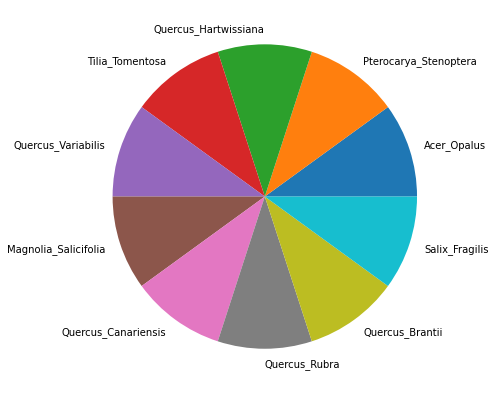

In [7]:
#  Sample of the species
fig = plt.figure(figsize =(10, 7))
plt.pie(df_train['species'].value_counts()[:10],labels=df_train['species'][:10]);

#check for the missing or duplicates

In [8]:
df_train.isna().sum()

species      0
margin1      0
margin2      0
margin3      0
margin4      0
            ..
texture60    0
texture61    0
texture62    0
texture63    0
texture64    0
Length: 193, dtype: int64

In [9]:
df_train.isna().sum().sum()

0

In [10]:
df_test.isna().sum()

margin1      0
margin2      0
margin3      0
margin4      0
margin5      0
            ..
texture60    0
texture61    0
texture62    0
texture63    0
texture64    0
Length: 192, dtype: int64

In [11]:
df_test.isna().sum().sum()

0

In [12]:
df_train.duplicated().sum()

0

In [13]:
df_test.duplicated().sum()

0

#data visualization

In [14]:
margin = df_train.iloc[:,:64]
texture = df_train.iloc[:,46:128]
shape = df_train.iloc[:,128:]

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='margin1', ylabel='texture1'>

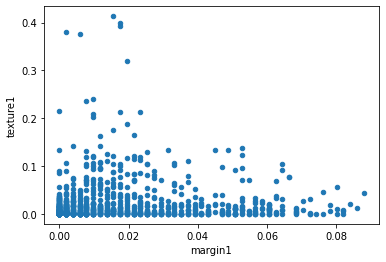

In [15]:
df_train.plot(x='margin1', y='texture1', kind='scatter')

<Axes: xlabel='margin1', ylabel='shape1'>

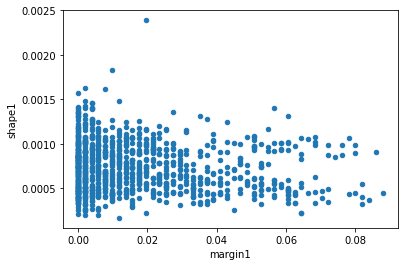

In [16]:
df_train.plot(x='margin1', y='shape1', kind='scatter')

<Axes: xlabel='texture1', ylabel='shape1'>

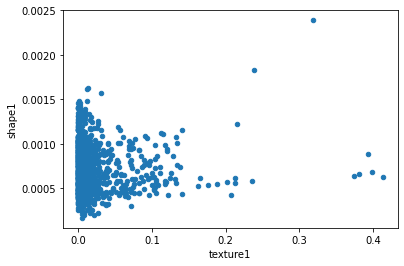

In [17]:
df_train.plot(x='texture1', y='shape1', kind='scatter')

In [37]:
with zipfile.ZipFile('/content/images.zip') as z_samp: z_samp.extractall()

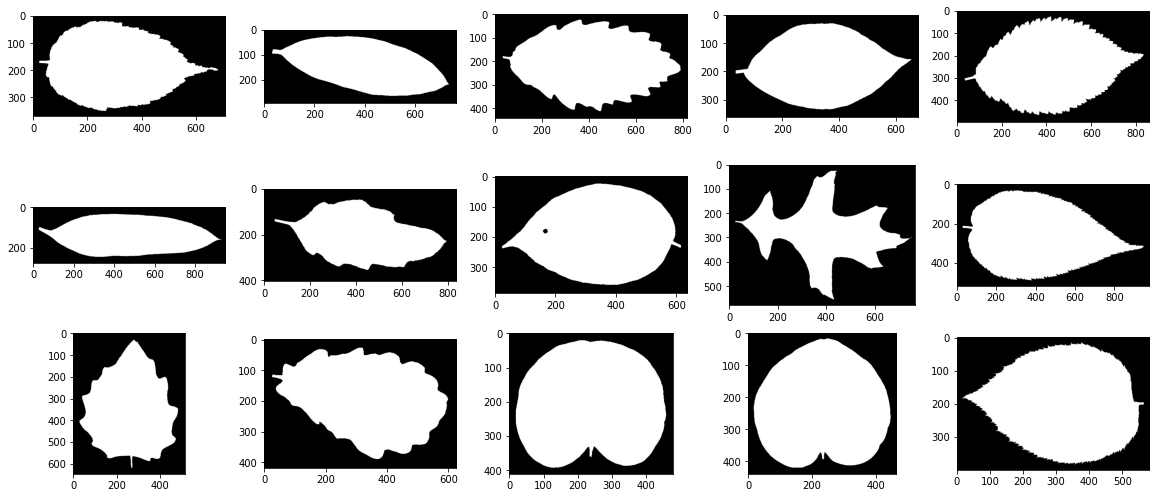

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
import cv2 as cv
from tensorflow.keras.preprocessing.image import load_img
for i in range(15):
    j=np.random.choice((os.listdir('images')))
    plt.subplot(5,5,i+1)
    img=load_img(os.path.join('images',j))
    plt.imshow(img)


In [20]:
len(os.listdir('images'))

1584

#correlation analysis

In [21]:
correlation_matrix= df_train.corr()
correlation_matrix

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
margin1,1.000000,0.806390,-0.182829,-0.297807,-0.475874,0.767718,0.066273,-0.094137,-0.181496,0.397138,...,0.137158,-0.047771,0.126227,-0.024139,-0.168201,0.035072,-0.007581,-0.033159,-0.075171,0.030414
margin2,0.806390,1.000000,-0.204640,-0.315953,-0.444312,0.825762,-0.083273,-0.086428,-0.120276,0.162587,...,0.154407,-0.021096,0.123834,-0.063654,-0.157842,0.081069,-0.007057,-0.037405,-0.098957,-0.029532
margin3,-0.182829,-0.204640,1.000000,0.120042,-0.185007,-0.163976,0.095449,0.024350,-0.000042,0.008772,...,0.047347,-0.027618,0.007261,-0.021390,0.033505,-0.019850,0.084957,-0.081999,-0.148193,0.061780
margin4,-0.297807,-0.315953,0.120042,1.000000,0.029480,-0.261437,-0.268271,-0.047693,0.227543,-0.173986,...,-0.071974,-0.009537,-0.050529,-0.044318,0.088857,-0.052317,0.320644,-0.073886,0.050970,0.014343
margin5,-0.475874,-0.444312,-0.185007,0.029480,1.000000,-0.438587,-0.108178,0.056557,0.196745,-0.320647,...,-0.165622,0.059135,0.012938,0.155327,0.149420,0.006542,-0.109229,0.151675,0.022299,-0.148834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
texture60,0.035072,0.081069,-0.019850,-0.052317,0.006542,0.066262,-0.034094,0.048647,-0.028292,0.020376,...,-0.129365,0.004412,-0.155187,0.240704,-0.183369,1.000000,-0.051838,0.265879,-0.089679,-0.190194
texture61,-0.007581,-0.007057,0.084957,0.320644,-0.109229,-0.050498,-0.163375,-0.079283,0.088517,-0.127373,...,-0.002235,0.053707,-0.072814,-0.084638,-0.023539,-0.051838,1.000000,-0.063582,-0.068065,0.036374
texture62,-0.033159,-0.037405,-0.081999,-0.073886,0.151675,-0.031555,0.015391,-0.048843,-0.031954,-0.014200,...,-0.217239,0.171577,-0.283316,0.563088,-0.128010,0.265879,-0.063582,1.000000,-0.058189,-0.245527
texture63,-0.075171,-0.098957,-0.148193,0.050970,0.022299,-0.132087,-0.001364,0.027758,-0.119494,-0.039193,...,-0.207887,0.002057,-0.064724,-0.059866,0.156568,-0.089679,-0.068065,-0.058189,1.000000,0.029305


In [22]:
correlation_matrix1= df_test.corr()
correlation_matrix1

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
margin1,1.000000,0.773549,-0.179688,-0.314669,-0.489724,0.758771,0.109006,-0.124012,-0.206356,0.428822,...,0.095548,-0.085175,0.119563,0.026546,-0.213600,0.153934,-0.054816,0.010933,-0.043275,0.026005
margin2,0.773549,1.000000,-0.228772,-0.312056,-0.476718,0.839972,-0.055350,-0.089673,-0.164098,0.176159,...,0.160932,-0.073517,0.160765,-0.041497,-0.205489,0.151150,-0.066164,-0.028058,-0.092966,-0.008868
margin3,-0.179688,-0.228772,1.000000,0.164221,-0.205369,-0.175065,0.019900,-0.022426,0.043036,-0.029816,...,0.071901,0.060990,-0.105442,-0.015316,0.044178,-0.036324,0.128882,-0.061109,-0.147547,-0.019413
margin4,-0.314669,-0.312056,0.164221,1.000000,0.018378,-0.266132,-0.307664,-0.105205,0.235059,-0.217483,...,-0.101321,-0.021906,-0.027073,-0.078067,0.066583,-0.046185,0.337250,-0.078419,-0.010801,-0.004705
margin5,-0.489724,-0.476718,-0.205369,0.018378,1.000000,-0.455129,-0.086207,0.049554,0.185162,-0.320386,...,-0.159061,0.053379,0.008987,0.105663,0.257331,-0.025405,-0.103416,0.126172,0.006287,-0.173556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
texture60,0.153934,0.151150,-0.036324,-0.046185,-0.025405,0.110988,-0.030828,0.012588,-0.038042,0.018067,...,-0.114019,0.003775,-0.140901,0.171537,-0.167058,1.000000,-0.048102,0.235210,-0.080099,-0.183907
texture61,-0.054816,-0.066164,0.128882,0.337250,-0.103416,-0.081673,-0.186244,-0.073920,0.095002,-0.149181,...,-0.015190,0.031717,-0.045883,-0.092276,0.007776,-0.048102,1.000000,-0.066475,-0.065108,0.072695
texture62,0.010933,-0.028058,-0.061109,-0.078419,0.126172,-0.037976,-0.022211,0.000104,-0.057942,0.003667,...,-0.212793,0.175092,-0.319452,0.616210,-0.110914,0.235210,-0.066475,1.000000,-0.056610,-0.284343
texture63,-0.043275,-0.092966,-0.147547,-0.010801,0.006287,-0.089921,0.064795,0.000549,-0.149321,0.105641,...,-0.231096,-0.050280,-0.022197,-0.031069,0.083541,-0.080099,-0.065108,-0.056610,1.000000,0.126769


#Encode the labels


In [23]:
X = df_train.drop('species',axis = 1)
y=df_train['species']

In [24]:
from numpy import argmax
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


#splitting the data

In [25]:
X_tr, X_val, y_tr, y_val = train_test_split(X,y,stratify=y,test_size = 0.2,random_state=42)

#the mean and standard deviation for each feature

In [26]:
mean = np.mean(X)
std = np.std(X)
zscores = (X-mean)/std
print(zscores)

       margin1   margin2   margin3   margin4   margin5   margin6   margin7  \
id                                                                           
1    -0.486611 -0.131357 -0.330956 -0.682244 -0.138444 -0.554066  0.465218   
2    -0.585602 -0.734880 -0.028561 -0.269558  0.605389 -0.704306  0.018812   
3    -0.585602 -0.483408 -0.482192 -0.544694 -0.563515 -0.629196  2.808662   
5    -0.882575 -0.634302 -0.330956 -0.613469  0.392826 -0.366289  0.242044   
6    -0.585602 -0.634302  0.651866 -0.475883 -0.032190 -0.441400 -0.762355   
...        ...       ...       ...       ...       ...       ...       ...   
1575  2.186354  2.332949 -0.935823 -0.682244 -0.776023  2.112575 -0.092775   
1578 -0.783584 -0.634302 -0.406593  2.963011 -0.669769 -0.741862 -1.097116   
1581 -0.783584 -0.634302 -1.238218 -0.063233  3.474413 -0.666751 -0.650767   
1582 -0.882575 -0.734880  0.576267  1.174824 -0.244698 -0.741862 -1.097116   
1584  0.305420 -0.231961 -0.028561 -0.269558 -0.457261 -0.366289

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [27]:
mean

margin1      0.017412
margin2      0.028539
margin3      0.031988
margin4      0.023280
margin5      0.014264
               ...   
texture60    0.014017
texture61    0.002688
texture62    0.020291
texture63    0.008989
texture64    0.019420
Length: 192, dtype: float64

In [28]:
std

margin1      0.019729
margin2      0.038835
margin3      0.025834
margin4      0.028397
margin5      0.018380
               ...   
texture60    0.060120
texture61    0.011409
texture62    0.039020
texture63    0.013784
texture64    0.022756
Length: 192, dtype: float64

In [29]:
X_tr = StandardScaler().fit_transform(X_tr)
X_val =  StandardScaler().fit_transform(X_val)


In [30]:
X_tr.mean(axis=0)

array([ 0.00000000e+00,  2.69144976e-17,  1.36815363e-16,  1.02611522e-16,
       -5.04646829e-17,  1.16629489e-16, -6.28004943e-17, -1.79429984e-17,
       -8.97149919e-17,  5.15861203e-17,  2.69144976e-17, -9.86864911e-17,
        3.14002472e-17, -4.59789333e-17, -6.72862439e-17,  0.00000000e+00,
       -2.06344481e-16,  5.15861203e-17, -2.91573724e-17, -1.12143740e-17,
       -8.07434927e-17, -1.19993802e-16, -4.48574959e-18, -2.29894667e-17,
       -2.13073106e-17, -1.70458485e-16,  2.24287480e-17, -1.05415115e-16,
       -1.79429984e-17, -6.50433691e-17,  1.45786862e-16, -6.84076813e-17,
       -8.97149919e-18, -5.60718699e-18,  5.83147447e-17, -5.83147447e-17,
       -3.81288716e-17,  8.97149919e-17,  0.00000000e+00,  4.93432455e-17,
       -2.69144976e-17,  2.80359350e-17,  6.72862439e-18, -1.07657990e-16,
       -1.07657990e-16, -1.00929366e-16,  8.97149919e-18, -1.30086738e-16,
       -2.24287480e-17, -4.48574959e-18, -1.79429984e-16,  3.47645594e-17,
       -2.31016104e-16, -

In [31]:
X_val.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.])

#part2: training a neural netwrok 


In [32]:
def scheduler(epoch, lr):
   if epoch < 10:
     return lr
   else:
     return lr * tf.math.exp(-0.1)

In [33]:
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [47]:
#build model function
def model_(neurons,l_2,dropOut,opti,epoch,batchSize,lR):
  model = Sequential()
  model.add(Dense(neurons,input_dim=192, kernel_initializer='glorot_normal', activation='tanh',kernel_regularizer=regularizers.l2(l_2)))
  model.add(Dropout(dropOut))
  model.add(Dense(99, activation='softmax'))
  
  model.compile(optimizer=opti, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  if lR==0:
    m=model.fit(X_tr, y_tr, epochs=epoch, batch_size=batchSize,verbose=0,callbacks=[callback] ,validation_data=(X_val,y_val))
  else:
    m=model.fit(X_tr, y_tr, epochs=epoch, batch_size=batchSize,verbose=0 ,validation_data=(X_val,y_val))

  loss, acc = model.evaluate(X_val, y_val)
  print(loss, acc)

  plt.style.use("ggplot")
  plt.figure()
  plt.plot(np.arange(0, epoch), m.history["loss"], label="train_loss")
  plt.plot(np.arange(0, epoch), m.history["val_loss"], label="val_loss")
  plt.plot(np.arange(0, epoch), m.history["accuracy"], label="train_acc")
  plt.plot(np.arange(0, epoch), m.history["val_accuracy"], label="val_acc")
  plt.title("Training Loss and Accuracy")
  plt.xlabel("Epoch ")
  plt.ylabel("Loss/Accuracy")
  plt.legend(loc="lower left")
  plt.savefig("plot1.png")

#training with Adam optimizer

In [ ]:
#neurons,l_2,dropOut,opti,epoch,batchSize,lR
# neurons: 
# L2: between 0 and 0.1  , (0.1, 0.001, 0.0001)
# DROPOUT:  between 0.5 and 0.8
#epoches : 10 to 1000 
# batch size:   16, 32, and 64  
# LR: 0.1 AND 0.001

7/7 [==============================] - 0s 3ms/step - loss: 0.5150 - accuracy: 0.9697
0.5150083303451538 0.9696969985961914


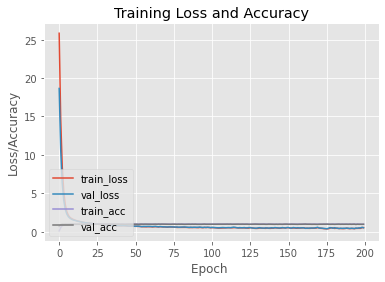

In [58]:
model_(512,0.1,0.6,tf.keras.optimizers.Adam(),200,32,0.01) 

7/7 [==============================] - 0s 4ms/step - loss: 0.8558 - accuracy: 0.9848
0.8558123707771301 0.9848484992980957


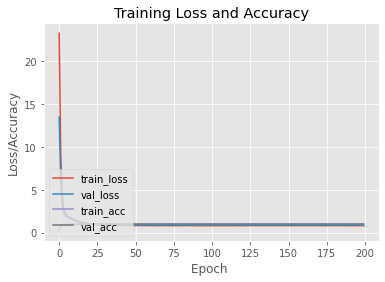

In [61]:
model_(700,0.1,0.7,tf.keras.optimizers.Adam(),200,16,0) #with learning rate scheduler

7/7 [==============================] - 0s 6ms/step - loss: 0.9286 - accuracy: 0.9343
0.9285567402839661 0.9343434572219849


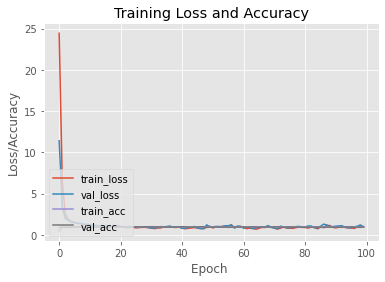

In [62]:
model_(3000,0.1,0.5,tf.keras.optimizers.Adam(),100,32,0.01)

7/7 [==============================] - 0s 4ms/step - loss: 0.2167 - accuracy: 0.9848
0.2167118787765503 0.9848484992980957


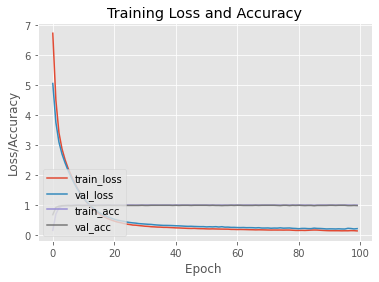

In [64]:
model_(600,0.01,0.4,tf.keras.optimizers.Adam(),100,64,0.01)

#training with SGD optimizer

In [ ]:
#neurons,l_2,dropOut,opti,epoch,batchSize,lR
# neurons: 
# L2: between 0 and 0.1  , (0.1, 0.001, 0.0001)
# DROPOUT:  between 0.5 and 0.8
#epoches : 10 to 1000 
# batch size:   16, 32, and 64  
# LR: 0.1 AND 0.001


7/7 [==============================] - 0s 5ms/step - loss: 0.3449 - accuracy: 0.9747
0.34486615657806396 0.9747474789619446


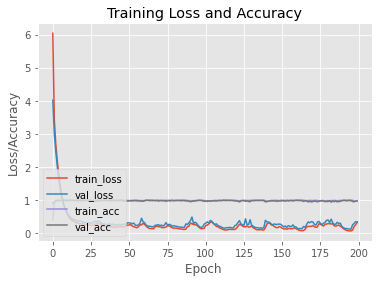

In [48]:
model_(1092,0.01,0.4,tf.keras.optimizers.Adam(),200,32,0.001)


7/7 [==============================] - 0s 4ms/step - loss: 3.5813 - accuracy: 0.9848
3.581268548965454 0.9848484992980957


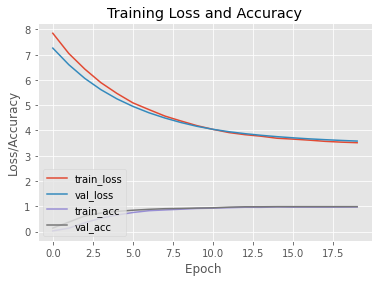

In [42]:
model_(1092,0.01,0.4,tf.keras.optimizers.SGD(),20,32,0) #with learning rate scheduler

7/7 [==============================] - 0s 6ms/step - loss: 0.1136 - accuracy: 0.9899
0.11358138173818588 0.9898989796638489


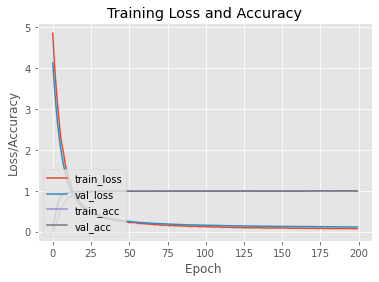

In [45]:
model_(800,0.0001,0.6,tf.keras.optimizers.SGD(),200,32,0.001)

7/7 [==============================] - 0s 5ms/step - loss: 1.3310 - accuracy: 0.9697
1.3309921026229858 0.9696969985961914


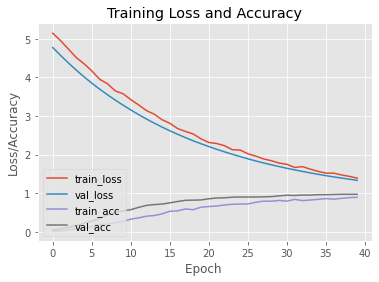

In [49]:
model_(1000,0.001,0.6,tf.keras.optimizers.SGD(),40,128,0.01)

#training with RMSprop optimizer

In [ ]:
#neurons,l_2,dropOut,opti,epoch,batchSize,lR
# neurons: 
# L2: between 0 and 0.1  , (0.1, 0.001, 0.0001)
# DROPOUT:  between 0.5 and 0.8 
# epoches :  to 
# batch size:  16, 32, and 64 
# LR: 0.001 OR 0.01


7/7 [==============================] - 0s 4ms/step - loss: 0.1767 - accuracy: 0.9848
0.1767059862613678 0.9848484992980957


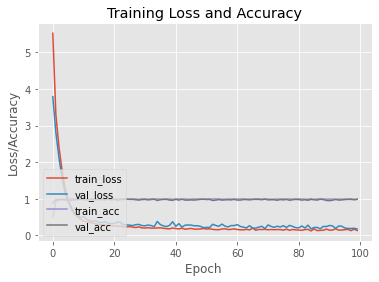

In [50]:
model_(1092,0.01,0.4,tf.keras.optimizers.RMSprop(),100,32,0.1) 

7/7 [==============================] - 0s 5ms/step - loss: 1.3856 - accuracy: 0.9899
1.3856197595596313 0.9898989796638489


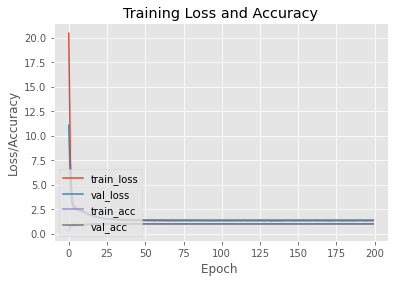

In [57]:
model_(1024,0.1,0.7,tf.keras.optimizers.RMSprop(),200,16,0) #with learning rate scheduler

7/7 [==============================] - 0s 4ms/step - loss: 0.0783 - accuracy: 0.9899
0.07825036346912384 0.9898989796638489


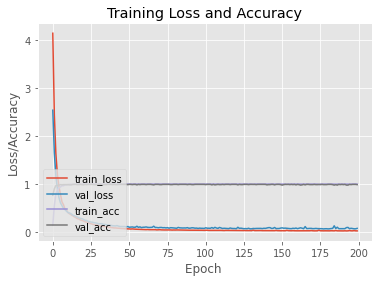

In [51]:
model_(512,0.001,0.6,tf.keras.optimizers.RMSprop(),200,64,0.01)

7/7 [==============================] - 0s 3ms/step - loss: 0.2653 - accuracy: 0.9646
0.2653411328792572 0.9646464586257935


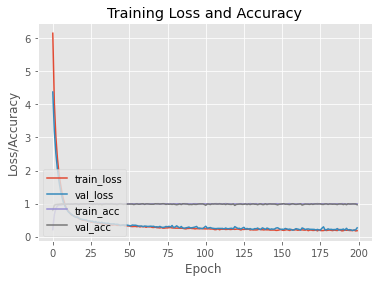

In [53]:
model_(512,0.01,0.6,tf.keras.optimizers.RMSprop(),200,16,0.0001)